# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

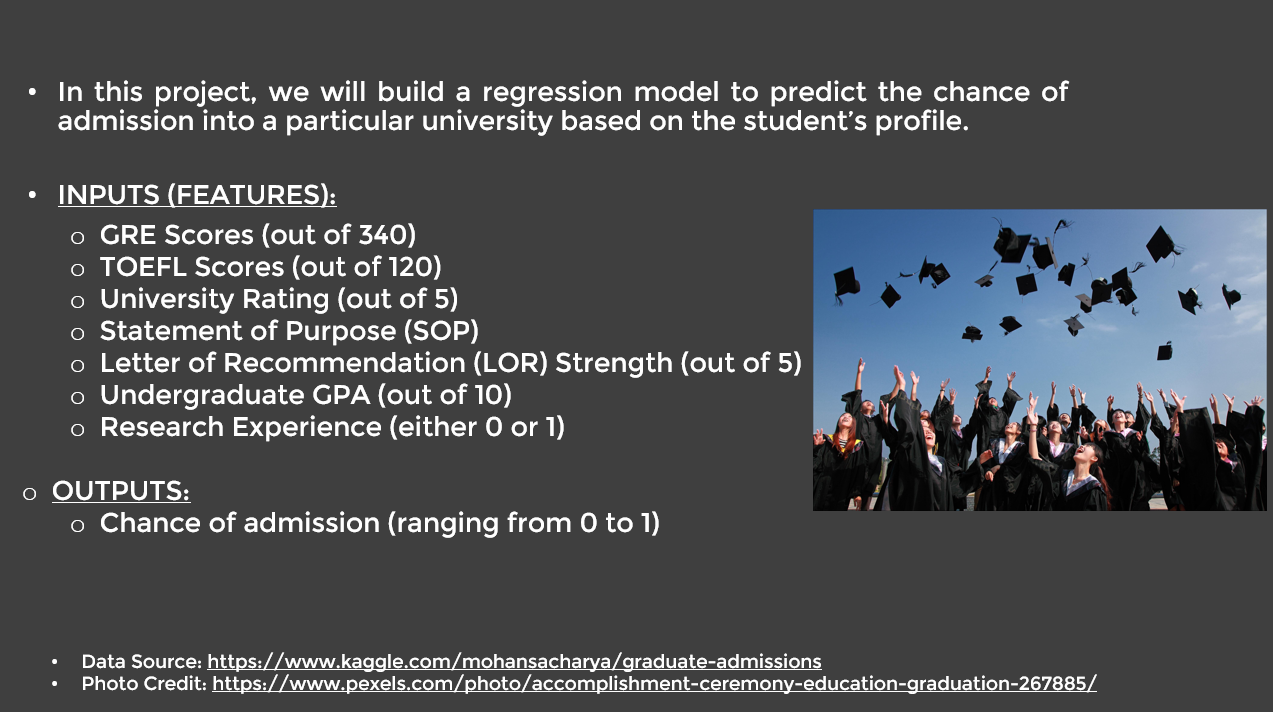

# TASK #2: IMPORT LIBRARIES AND DATASET

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [46]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
# Let's drop the serial no.
admission_df.drop('Serial No.',axis=1,inplace=True)

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [48]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [49]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [50]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [51]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000087FC381308>,
      dtype=object)

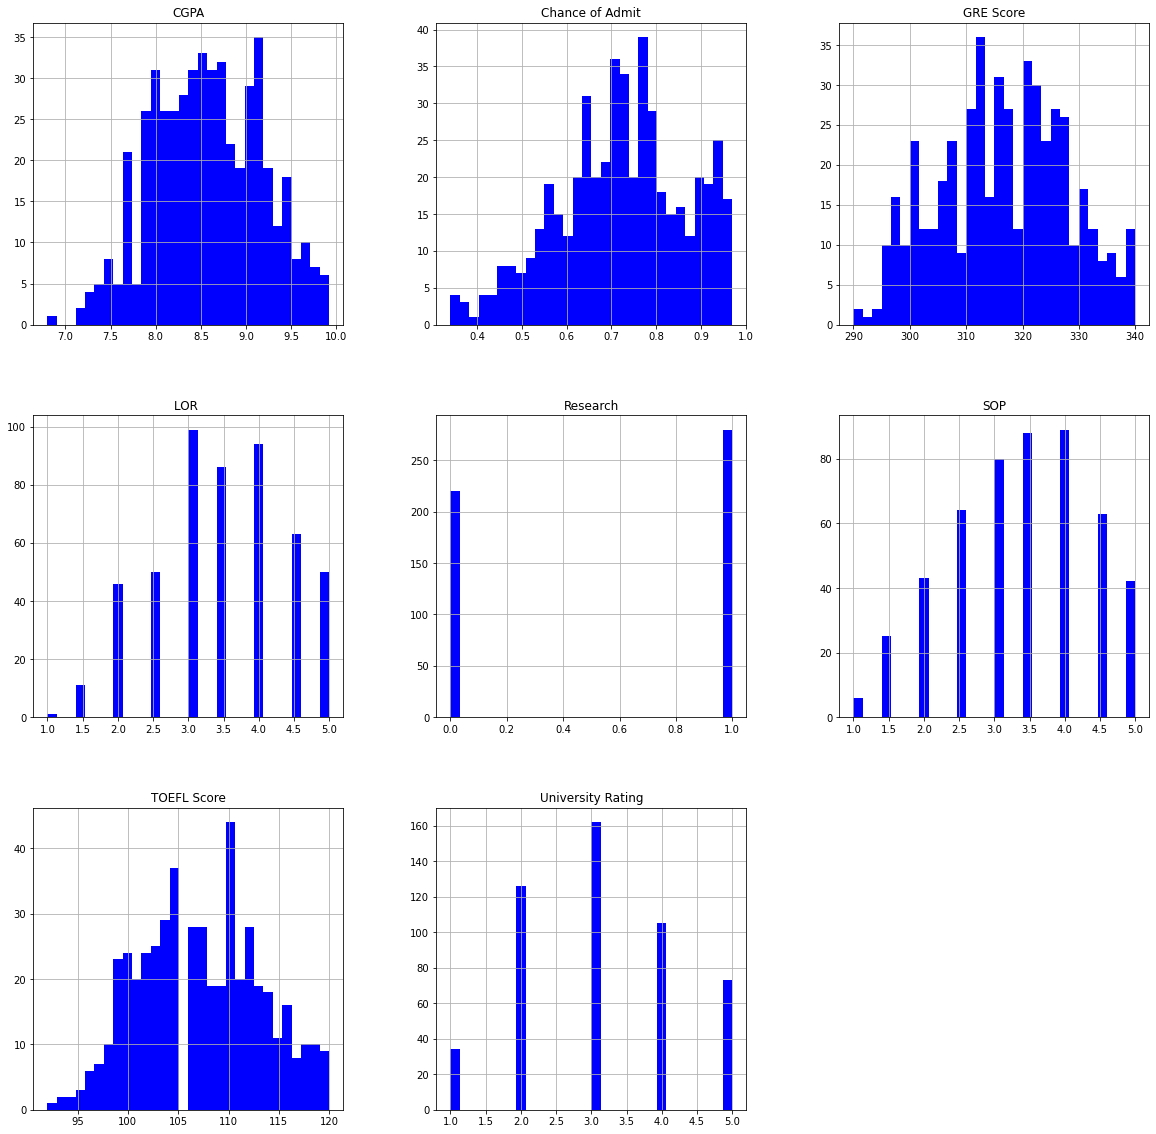

In [52]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'blue')

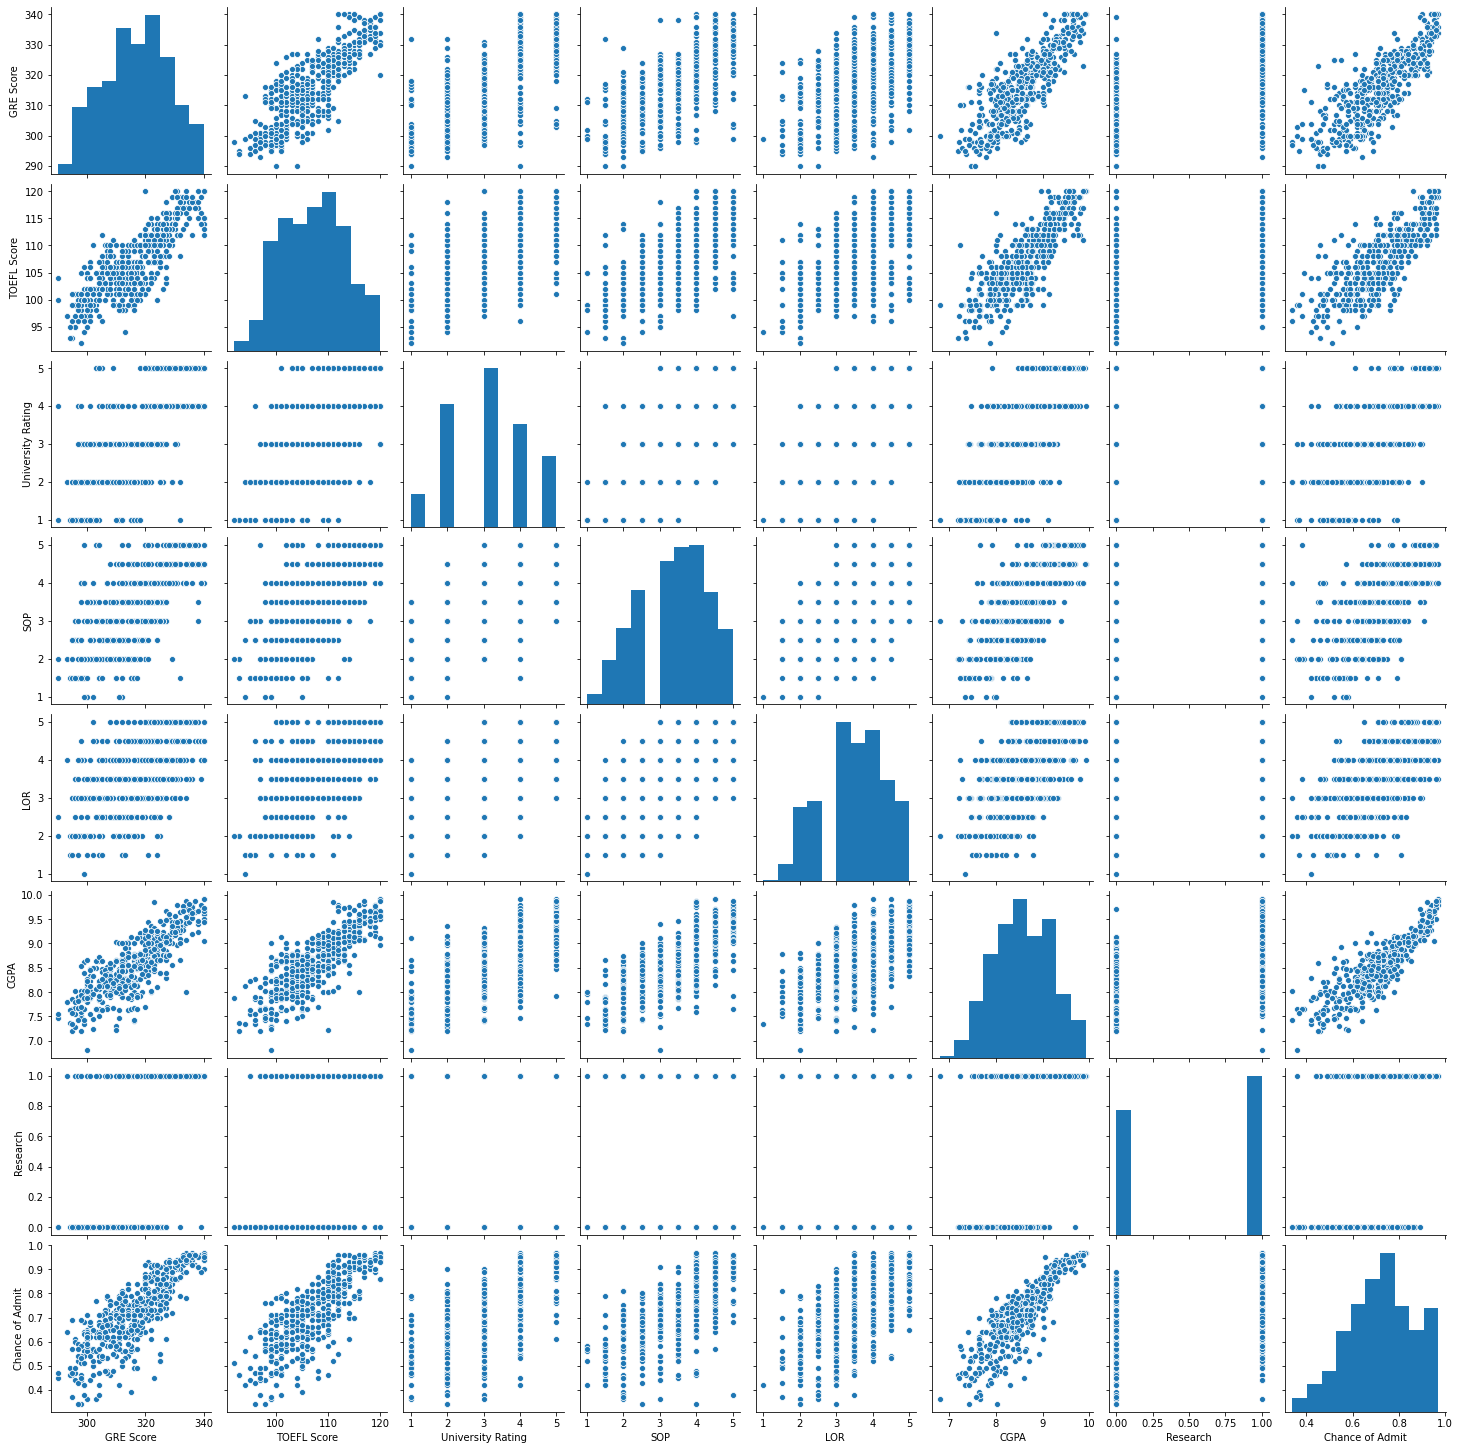

In [53]:
sns.pairplot(admission_df)

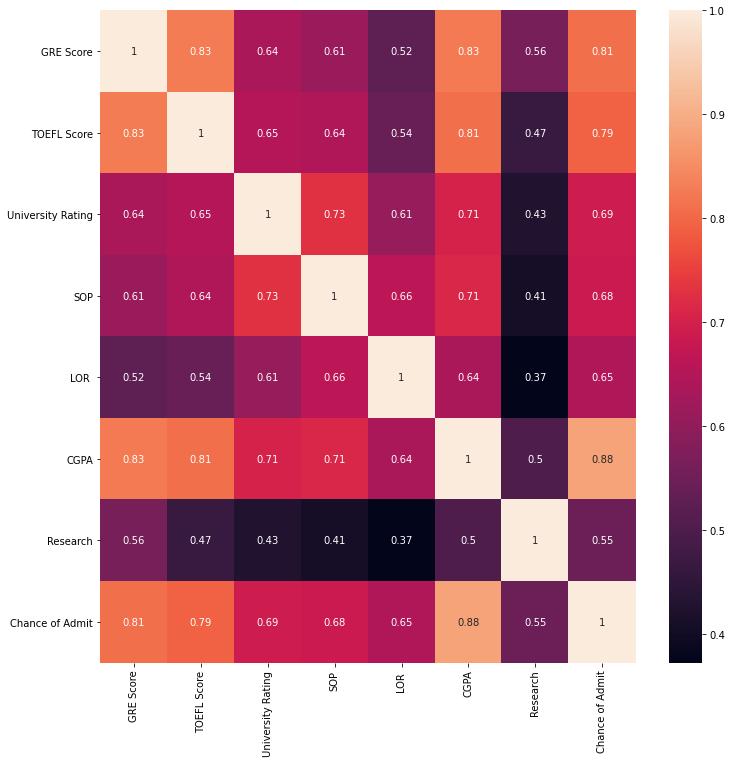

In [54]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [55]:
X=admission_df.drop(['Chance of Admit'],axis=1)

In [56]:
y = admission_df['Chance of Admit']

In [57]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [58]:
y=np.array(y)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [59]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [60]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [62]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
acc_lin_reg = reg.score(X_test , y_test)
acc_lin_reg

0.8321018353648422

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [65]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [66]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [67]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/100
340/340 [==============================] - 1s 3ms/sample - loss: 0.6382 - val_loss: 0.2099
Epoch 2/100
340/340 [==============================] - 0s 250us/sample - loss: 0.4189 - val_loss: 0.1997
Epoch 3/100
340/340 [==============================] - 0s 206us/sample - loss: 0.3543 - val_loss: 0.1615
Epoch 4/100
340/340 [==============================] - 0s 182us/sample - loss: 0.3122 - val_loss: 0.1598
Epoch 5/100
340/340 [==============================] - 0s 189us/sample - loss: 0.2979 - val_loss: 0.1612
Epoch 6/100
340/340 [==============================] - 0s 198us/sample - loss: 0.2825 - val_loss: 0.1572
Epoch 7/100
340/340 [==============================] - 0s 212us/sample - loss: 0.2710 - val_loss: 0.1586
Epoch 8/100
340/340 [==============================] - 0s 203us/sample - loss: 0.2554 - val_loss: 0.1550
Epoch 9/100
340/340 [==============================] - 0s 554us/sample - loss: 0.2546 - val_loss: 0.1712
Epoch 10/100

Epoch 78/100
340/340 [==============================] - 0s 218us/sample - loss: 0.1392 - val_loss: 0.2320
Epoch 79/100
340/340 [==============================] - 0s 209us/sample - loss: 0.1544 - val_loss: 0.2325
Epoch 80/100
340/340 [==============================] - 0s 209us/sample - loss: 0.1352 - val_loss: 0.2356
Epoch 81/100
340/340 [==============================] - 0s 198us/sample - loss: 0.1208 - val_loss: 0.2266
Epoch 82/100
340/340 [==============================] - 0s 257us/sample - loss: 0.1283 - val_loss: 0.2224
Epoch 83/100
340/340 [==============================] - 0s 215us/sample - loss: 0.1570 - val_loss: 0.2215
Epoch 84/100
340/340 [==============================] - 0s 206us/sample - loss: 0.1373 - val_loss: 0.2180
Epoch 85/100
340/340 [==============================] - 0s 403us/sample - loss: 0.1262 - val_loss: 0.2366
Epoch 86/100
340/340 [==============================] - 0s 388us/sample - loss: 0.1456 - val_loss: 0.2367
Epoch 87/100
340/340 [========================

In [68]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 147us/sample - loss: 0.2029
Accuracy : 0.7970634387930234


In [69]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

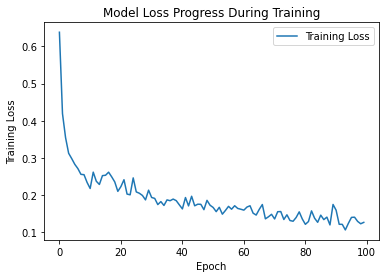

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [71]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [72]:
acc_DT = DT_model.score(X_test,y_test)
acc_DT

0.5389031955338638

In [73]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators =100,max_depth =10)
RF_model.fit(X_train,y_train)

C:\Users\Rohit\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [74]:
acc_RF = RF_model.score(X_test,y_test)
acc_RF

0.7756676958937677

# TASK #9: CALCULATE REGRESSION MODEL KPIs

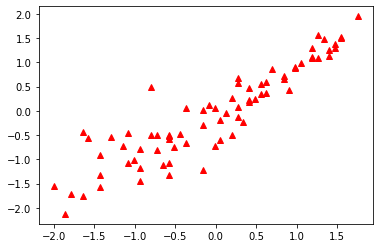

In [75]:
pred = reg.predict(X_test)
plt.plot(y_test, pred,'^r')

In [76]:
pred_org = scaler_y.inverse_transform(pred)
y_test_org = scaler_y.inverse_transform(y_test)

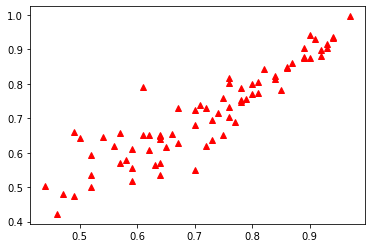

In [77]:
plt.plot(y_test_org,pred_org,'^r')

In [78]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_org, pred_org)),'.3f'))
MSE = mean_squared_error(y_test_org, pred_org)
MAE = mean_absolute_error(y_test_org, pred_org)
r2 = r2_score(y_test_org,pred_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.057 
MSE = 0.003231512842096867 
MAE = 0.04079032771459496 
R2 = 0.8321018353648422 
Adjusted R2 = 0.8145602360746018
